In [1]:
# # NES Emulator for OpenAI Gym
# from nes_py.wrappers import JoypadSpace
# # Super Mario environment for OpenAI Gym
# import gym_super_mario_bros
# from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT 
# # env = gym_super_mario_bros.make('SuperMarioBros-v0')
# env = gym_super_mario_bros.make("SuperMarioBros-1-1-v3")
# env = JoypadSpace(env, SIMPLE_MOVEMENT)
# n_actions = env.action_space.n
# print("Action :",n_actions)

Action : 7


In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
import gym
done = True
for step in range(5):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()

env.close()

In [5]:
env = gym_super_mario_bros.make("SuperMarioBros-1-1-v3")
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = gym.wrappers.RecordVideo(env, video_folder='videos')

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/gym/wrappers/record_video.py:41: UserWarning: WARN: Overwriting existing videos at /Users/atichetsurakul/Desktop/JAN23/DRLearn/Proj/oursteal/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [23]:
import torch
a= torch.zeros(2,3,28,28)
a[0].shape
for i,_ in enumerate(a):
    print(i)

0
1


In [17]:
# print(type(state/255))
# type(env.action_space.sample())
env.observation_space.shape

(240, 256, 3)

In [10]:
from torchvision import transforms
# input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(28),
    # transforms.CenterCrop(28),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0)

In [11]:
import cv2
res = cv2.resize(state, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
import numpy as np
seeveetwo = lambda x: cv2.resize(x, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# # state_ = 
input_tensor = preprocess(seeveetwo(state)).unsqueeze(0)

In [24]:
# input_tensor
print(type(state[0][0][0]))

<class 'numpy.uint8'>


: 

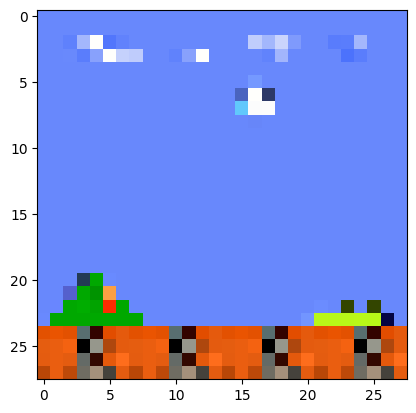

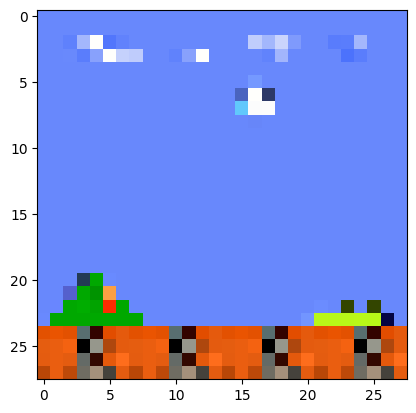

In [13]:
import matplotlib.pyplot as plt
plt.imshow(input_tensor[0].permute(1, 2, 0))
plt.show()
plt.imshow(res)


In [60]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
import torch.nn as nn
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,20)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [79]:
import torch
model = ConvolutionalNetwork()
# model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

y_pred = model(input_tensor)

In [80]:
y_pred.shape

torch.Size([1, 20])